<a href="https://colab.research.google.com/github/Oumar199/OpenclassroomProject/blob/main/le_probleme_de_monty_hall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Le probleme de monty hall


## Simulation 

### Génération d'une seule partie de jeu

Préparons un environnement  de travail dans notebook :

In [2]:
#Pour afficher les graphiques dans la continuité du code et non dans une fenetre a part :
%matplotlib inline

#Pour utiliser la fonction randint qui permet de generer des nombres entiers aleatoires :
from random import randint, seed

#Un Enum est une structure de donnees qui consiste en un ensemble d'elements nommes, 
#Une variable de ce type peut avoir comme valeur un de ces elements
from enum import Enum

#Pour pouvoir afficher des graphiques
import matplotlib.pyplot as plt

### Les stratégies du joueur

In [4]:
# Ici nous définissons une sous-classe de Enum, qui contiendra 
# les stratégies possibles
class Strategie(Enum):
  CHANGER = 1
  GARDER = 2

In [7]:
# Utilise l'horloge système pour initialiser le générateur de 
# nombres pseudo-aléatoires.
seed()

def play_game(strategie):
  '''Simule une partie du jeu Monty Hall.

  Cette fonction simule le choix de la porte par le participant,
  l'élimination d'une mauvaise porte par le présentateur, et le 
  choix final. Elle ne retourne que le résultat de la partie, parce
  que nous n'aurons besoin que du résultat pour effectuer nos calculs.

  Args:
    strategie (Strategie): La stratégie du joueur

  Returns:
    bool: le joueur a-t-il gagné?
  '''
  portes = [0, 1, 2]
  
  bonne_porte = randint(0, 2)

  # Choix du joueur
  premier_choix = randint(0, 2)

  # Il nous reste deux portes
  portes.remove(premier_choix)

  #Le présentateur élimine une porte
  if premier_choix == bonne_porte:
    portes.remove(portes[randint(0, 1)])
  else:
    portes = [bonne_porte]

  deuxieme_choix = 0
  #Le deuxieme choix depend de la strategie
  if strategie == Strategie.CHANGER:
    deuxieme_choix = portes[0]
  elif strategie == Strategie.GARDER:
    deuxieme_choix = premier_choix
  else:
    raise ValueError("Stratégie non reconnue!")

  return deuxieme_choix == bonne_porte

## Simulation de plusieurs parties

Pour vérifier si le résultat de la fonction est aléatoire appelons la plusieurs fois

In [20]:
play_game(Strategie.CHANGER)

True

Nous allons stocker à présent les résultats dans une liste. Donc créons une fonction nous permettant de le faire

In [22]:
def play(strategie, nb_tours):
  '''Simule une suite de tours du jeu.

  Cette fonction renvoie les résultats de plusieurs parties 
  du jeu Monty Hall sous forme d'une liste de gains par le 
  joueur.

  Args:
    strategie (Strategie): La strategie du joueur
    nb_tours (int): Nombre de tours

  Returns:
    list: Liste des gains du joueurs à chaque partie
  '''

  #Ceci est une liste en compréhension
  return [1 if play_game(strategie) else 0 for i in range(nb_tours)]

## Analyse des résultats


In [27]:
print("En changeant de porte, le joueur a gagné {} sur 10000 parties.".format(sum(play(Strategie.CHANGER, 10000))))
print("En gardant son choix initial, le joueur a gagné {} sur 10000 parties.".format(sum(play(Strategie.GARDER, 10000))))

En changeant de porte, le joueur a gagné 6642 sur 10000 parties.
En gardant son choix initial, le joueur a gagné 3382 sur 10000 parties.


## Visualisation

### La fonction *plot*


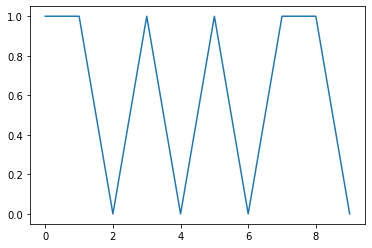

In [31]:
#plot renvoie un objet, que l'on pourra manipuler plus tard pour
#personnaliser le graphique
plot = plt.plot(play(Strategie.CHANGER, 10))

Essayons de créer un graphique avec 10000 points.

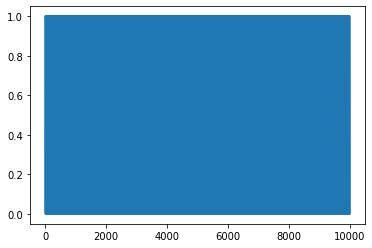

In [32]:
plot = plt.plot(play(Strategie.CHANGER, 10000))

Le carré que vous voyez est dû au fait que  plot  relie les points que nous lui demandons de placer sur le graphe par des lignes. Ce sont ces lignes qui recouvrent toute la surface du graphe, et non pas les points que nous voudrions en fait voir.

De manière générale, ces lignes peuvent être trompeuses, parce qu'elles peuvent aussi donner l'impression que nous avons des données entre deux points, alors que ce n'est pas le cas. Pour cette raison, nous allons placer les points sur le graphe sans les relier entre eux.

#### La fonction scatter

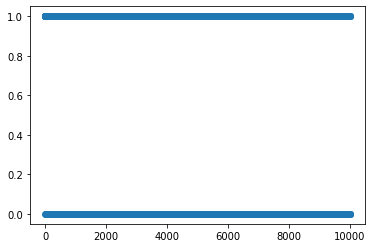

In [33]:
plot = plt.scatter(range(10000), play(Strategie.CHANGER, 10000))

La fonction  scatter  se comporte comme  plot, mais ne relie pas les points entre eux. Ici nous voyons bien que nos points sont bien situés là où ils doivent être.

Une compétence essentielle pour tout data scientist est de savoir présenter les résultats dans le bon format. Dans notre cas, nous voulons montrer la différence entre les gains des deux stratégies.

#### La fonction bar

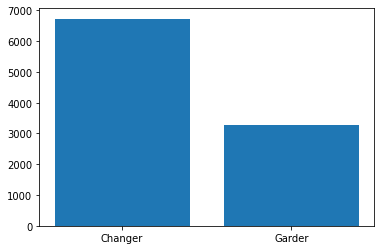

In [34]:
plot = plt.bar([1, 2], [sum(play(Strategie.CHANGER, 10000)), sum(play(Strategie.GARDER, 10000))], tick_label = ["Changer", "Garder"])

### Visualiser une liste de nombres

Nous pouvons vérifier que notre programme se comporte de manière raisonnable si nous détectons une relation linéaire entre les gains des joueurs et le nombre de parties qu'ils ont joué.

In [35]:
gains_changer = []
gains_garder = []
samples = [1000, 10000, 20000, 50000, 80000, 100000]
for tours in samples:
  gains_changer.append(play(Strategie.CHANGER, tours))
  gains_garder.append(play(Strategie.GARDER, tours))

Nous avons maintenant deux listes. L'une contenant les gains d'un joueur qui change de porte systématiquement après 1000, 10000, 20000, 50000, 80000 et 100000 parties. L'autre contient la même chose, mais pour un joueur qui ne change jamais de porte. Nous allons maintenant afficher les deux courbes correspondant à ces listes sur le même graphique. Remarquez que nous donnons deux arguments à  scatter. Le premier est la liste des abscisses.

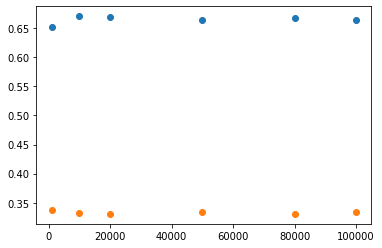

In [38]:
figure = plt.figure()
plot = plt.scatter(samples, [sum(x)/samples[i] for i, x in enumerate(gains_changer)])
plot = plt.scatter(samples, [sum(x)/samples[i] for i, x in enumerate(gains_garder)])

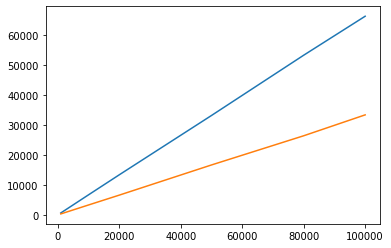

In [37]:
plot = plt.plot(samples, [sum(x) for x in gains_changer])
plot = plt.plot(samples, [sum(x) for x in gains_garder])